## Práctica 1

### Introducción a la práctica

#### Input variables
#### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  
5 - default: has credit in default? (categorical: "no","yes","unknown")
   
6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone") 
   
9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Importación de las librerias

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Cargamos el dataset

In [3]:
filename = 'bank-additional-full.csv'
missing_values = ['unknown', 'nonexistent']
df = pd.read_csv(filename, delimiter = ';', na_values = missing_values )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes


##### Análisis de los missing values

In [24]:
# Identifiquemos los missing values
df_nas = pd.isna(df)
for col in df_nas.columns:
        nas = sum(df_nas[col])
        print(f'{col}:{nas} NA : {100*nas/len(df_nas[col])}%')

withNa = sum(df_nas.apply(any, axis=1))
print(f'El número total de registros con valor NA es: {withNa}, {withNa/len(df_nas)*100}%')

age:0 NA : 0.0%
job:330 NA : 0.8012042342429834%
marital:80 NA : 0.1942313295134505%
education:1731 NA : 4.202680392347285%
default:8597 NA : 20.872584247839175%
housing:990 NA : 2.40361270272895%
loan:990 NA : 2.40361270272895%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:35563 NA : 86.3431096435855%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 36536, 88.70544818879286%


#### Normalización y transformación de los datos

In [33]:
# En primer lugar, realicemos una tranformación sobre los datos categóricos (codificación),
df['housing'] = df['housing'].replace(['yes','no'],[1,0])
df['marital'] = df['marital'].replace(['married','single','divorcied'], [2, 1, 0])
df['loan'] = df['loan'].replace(['yes','no'],[0,1])
df['contact'] = df['contact'].replace(['telephone','cellular'], [0,1])
df['poutcome'] = df['poutcome'].replace(['failure', 'success'], [0,1])
df['day_of_week'] = df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],[1,2,3,4,5])
df['month'] = df['month'].replace(['mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec', ],[1,2,3,4,5,6,7,8,9,10])
df['education'] = df['education'].replace(['illiterate','basic.4y','basic.6y','basic.9y', 'high.school',   'professional.course',  'university.degree'], [0,1,2,3,4,5,6])
df['job'] = df['job'].replace(['unemployed','student','retired','housemaid', 'blue-collar', 'technician','self-employed','services', 'admin.','management','entrepreneur'],[1,2,3,4,5,6,7,8,9,10,11])
df['y'] = df['y'].replace(['yes','no'],[1,0])
df['pdays'] = df['pdays'].replace([999],['NaN'])

In [26]:
#Normalizaremos los datos que adoptan un conjunto de valores continuos en el espectro y 
#que abarcan un amplio intervalo. Todo esto lo hacemos para que el posterior análisis sea más sencillo.
#Aplicaremos la normalización mínimo-máximo

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df['duration'] = minmax_norm(df['duration'])
df['euribor3m'] = minmax_norm(df['euribor3m'])
df['cons.conf.idx'] = minmax_norm(df['cons.conf.idx'])

#### Correlación y falsos predictores

In [35]:
#Veamos si existe algún tipo de correlación entre las variables numéricas de nuestro dataset
df_new = df[['duration', 'campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
correlation  = df_new.corr()
correlation

,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
duration,1.000000,-0.071699,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,-0.071699,1.000000,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
emp.var.rate,-0.027968,0.150754,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.005312,0.127836,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,-0.008173,-0.013733,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,-0.032897,0.135133,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.044703,0.144095,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.405274,-0.066357,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


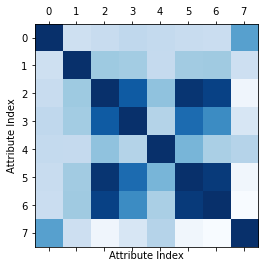

In [36]:
#graficamente la matriz de dispersión
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()

In [34]:
#Existe una correlación entre el euribor3m y el nr.employed,
# entre el euribor3m y emp.var.rate y entre emp.var.rate y nr.employed.

#Por lo que podemos definir una tabla reducida obviando el emp.var.rate y nr.employed
df_red = df.drop(['emp.var.rate', 'nr.employed'], axis = 1)
df_red

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,4.0,2,1.0,no,0.0,1.0,0,3,1,0.053070,1,NaN,0,NaN,93.994,0.60251,0.957379,0
1,57,8.0,2,4.0,NaN,0.0,1.0,0,3,1,0.030297,1,NaN,0,NaN,93.994,0.60251,0.957379,0
2,37,8.0,2,4.0,no,1.0,1.0,0,3,1,0.045954,1,NaN,0,NaN,93.994,0.60251,0.957379,0
3,40,9.0,2,2.0,no,0.0,1.0,0,3,1,0.030704,1,NaN,0,NaN,93.994,0.60251,0.957379,0
4,56,8.0,2,4.0,no,0.0,0.0,0,3,1,0.062424,1,NaN,0,NaN,93.994,0.60251,0.957379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3.0,2,5.0,no,1.0,1.0,1,9,5,0.067914,1,NaN,0,NaN,94.767,0.00000,0.089322,1
41184,46,5.0,2,5.0,no,0.0,1.0,1,9,5,0.077877,1,NaN,0,NaN,94.767,0.00000,0.089322,0
41185,56,3.0,2,6.0,no,1.0,1.0,1,9,5,0.038430,2,NaN,0,NaN,94.767,0.00000,0.089322,0
41186,44,6.0,2,5.0,no,0.0,1.0,1,9,5,0.089874,1,NaN,0,NaN,94.767,0.00000,0.089322,1


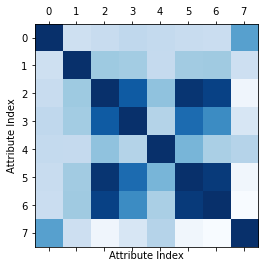

In [38]:
# Determinemos si hubiese falsos predictores
#Para esto vamos a ver si alguna de los atributos numéricos tiene influye 
#decisivamente sobre la salida. De existir una fuerte correlación, habría que analizar
#si se tratase o no se un falso predictor.

#Para comprobarlo graficamente vamos a añadir a la matriz de correlación anterior la salida "y". 
df_pred = df[['duration', 'campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_pred  = df_pred.corr()
plt.figure()
plt.matshow(correlation_pred, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()
#Tal y como se observa en la matriz, no hay ninguna correlación fuerte entre las variables de entrada y de salida
#por lo que podemos concluir que no existen falsos predictores.